#CNN-Image classification

In [1]:
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
img1 = cv2.imread('/content/drive/MyDrive/Data (1)/Training/1/1-1.png')
img1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2RGB)

img2 = cv2.imread('/content/drive/MyDrive/Data (1)/Testing/9/9-36.png')
img2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,4))
plt.subplot(121),plt.imshow(img1)
plt.subplot(122),plt.imshow(img2)

(<Axes: >, <matplotlib.image.AxesImage at 0x7fa070a599c0>)

In [5]:
width = 28
num_classes = 9
trainpath = '/content/drive/MyDrive/Data (1)/Training'
testpath = '/content/drive/MyDrive/Data (1)/Testing'
trainImg = [f'{trainpath}/{f}' for f in listdir(trainpath)]
testImg = [f'{testpath}/{f}' for f in listdir(testpath)]

In [6]:
trainImg

['/content/drive/MyDrive/Data (1)/Training/3',
 '/content/drive/MyDrive/Data (1)/Training/7',
 '/content/drive/MyDrive/Data (1)/Training/6',
 '/content/drive/MyDrive/Data (1)/Training/2',
 '/content/drive/MyDrive/Data (1)/Training/5',
 '/content/drive/MyDrive/Data (1)/Training/4',
 '/content/drive/MyDrive/Data (1)/Training/8',
 '/content/drive/MyDrive/Data (1)/Training/9',
 '/content/drive/MyDrive/Data (1)/Training/1']

In [7]:
def img2data(path):
  rawImgs = []
  labels = []

  for imagePath in (path):
      for item in tqdm(listdir(imagePath)):
          file = join(imagePath, item)
          if file[-1] =='g':
            img = cv2.imread(file,0)
            img = cv2.resize(img ,(width,width))
            rawImgs.append(img)
          
            l = imagePath[-1]
            
            if l == '1':
              labels.append([1,0,0,0,0,0,0,0,0])         
            elif l == '2':
              labels.append([0,1,0,0,0,0,0,0,0])
            elif l == '3':
              labels.append([0,0,1,0,0,0,0,0,0])
            elif l == '4':
              labels.append([0,0,0,1,0,0,0,0,0])
            elif l == '5':
              labels.append([0,0,0,0,1,0,0,0,0])
            elif l == '6':
              labels.append([0,0,0,0,0,1,0,0,0])
            elif l == '7':
              labels.append([0,0,0,0,0,0,1,0,0])
            elif l == '8':
              labels.append([0,0,0,0,0,0,0,1,0])
            elif l == '9':
              labels.append([0,0,0,0,0,0,0,0,1])
          
          

  return rawImgs, labels

In [8]:
x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 15/15 [00:09<00:00,  1.65it/s]


In [9]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((315, 28, 28), (315, 9), (135, 28, 28), (135, 9))

In [11]:
# model = Sequential([
#         Conv2D(32, kernel_size = 3, activation='relu',  input_shape=(width, width, 3)),
#         MaxPooling2D(2),
#         Conv2D(32, kernel_size = 3, activation='relu'),
#         BatchNormalization(),
#         Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'),
#         BatchNormalization(),
#         Dropout(0.4),
#         Conv2D(64, kernel_size = 3, activation='relu'),
#         BatchNormalization(),
#         Conv2D(64, kernel_size = 3, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.4),
#         Flatten(),
#         Dropout(0.4),
#         Dense(9, activation='softmax')
#     ])

In [12]:
model = Sequential([
        Conv2D(128, kernel_size = 3, activation='relu',  input_shape=(width, width,1)),
        MaxPooling2D(2),

        Dropout(0.2),
        
        Conv2D(128, kernel_size = 3, activation='relu'),
        MaxPooling2D(2),

        Dropout(0.2),
        
        Conv2D(128, kernel_size = 3, activation='relu'),
        MaxPooling2D(2),

        Flatten(),

        Dense(512, activation='relu'),
        Dense(9, activation='softmax')
    ])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 128)         0

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics= ['accuracy'])
batch_size = 100
epochs = 100

In [15]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))

Epoch 1/100
4/4 [==============================] - 11s 254ms/step - loss: 2.2131 - accuracy: 0.0762 - val_loss: 2.1940 - val_accuracy: 0.1704
Epoch 2/100
4/4 [==============================] - 0s 27ms/step - loss: 2.1944 - accuracy: 0.1302 - val_loss: 2.1899 - val_accuracy: 0.1111
Epoch 3/100
4/4 [==============================] - 0s 24ms/step - loss: 2.1889 - accuracy: 0.1143 - val_loss: 2.1782 - val_accuracy: 0.1111
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 2.1764 - accuracy: 0.1111 - val_loss: 2.1488 - val_accuracy: 0.1185
Epoch 5/100
4/4 [==============================] - 0s 25ms/step - loss: 2.1392 - accuracy: 0.1619 - val_loss: 2.0884 - val_accuracy: 0.4370
Epoch 6/100
4/4 [==============================] - 0s 26ms/step - loss: 2.0616 - accuracy: 0.4762 - val_loss: 1.9829 - val_accuracy: 0.2222
Epoch 7/100
4/4 [==============================] - 0s 27ms/step - loss: 1.9289 - accuracy: 0.3492 - val_loss: 1.7459 - val_accuracy: 0.4963
Epoch 8/100
4/4 [=

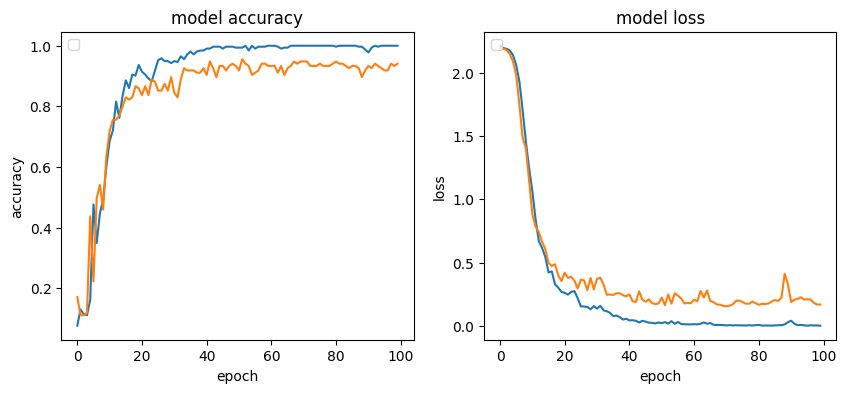

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(121),
plt.title('model accuracy');plt.ylabel('accuracy');plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['accuracy']);plt.plot(history.history['val_accuracy'])

plt.subplot(122)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['loss']);plt.plot(history.history['val_loss'])

In [17]:
score ,acc = model.evaluate(x_test,y_test)
print("Score is :",score)
print("Accuracy :",acc)

5/5 [==============================] - 0s 29ms/step - loss: 0.1695 - accuracy: 0.9407
Score is : 0.1695016622543335
Accuracy : 0.9407407641410828


In [18]:
import pandas as pd

err_hist = history.history
pd.DataFrame(err_hist).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.6) # set the vertical range to [0-1]
plt.show()

In [19]:
predictions = model.predict(x_test)

5/5 [==============================] - 0s 3ms/step


In [20]:
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(predictions,axis=1), labels=np.arange(num_classes))
print(cm)

[[14  0  0  1  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0]
 [ 0  1 13  0  0  0  0  1  0]
 [ 1  0  0 14  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  1]
 [ 0  0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  0 14  1  0]
 [ 0  0  0  0  0  0  2 13  0]
 [ 0  0  0  0  0  0  0  0 15]]


In [21]:
clr1 = classification_report(np.argmax(y_test,axis=1), np.argmax(predictions,axis=1), labels=np.arange(num_classes))
print(clr1)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.94      1.00      0.97        15
           2       1.00      0.87      0.93        15
           3       0.93      0.93      0.93        15
           4       1.00      0.93      0.97        15
           5       1.00      1.00      1.00        15
           6       0.88      0.93      0.90        15
           7       0.87      0.87      0.87        15
           8       0.94      1.00      0.97        15

    accuracy                           0.94       135
   macro avg       0.94      0.94      0.94       135
weighted avg       0.94      0.94      0.94       135



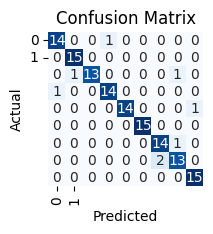

In [22]:
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5,  rotation=90)
plt.yticks(ticks=np.arange(2) + 0.5,  rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('Confusion Matrix55.png')
plt.show()

In [31]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save("models.h5")

In [26]:
pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
stats

In [32]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,"/content")